In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from analysis_functions import *

In [2]:
warnings.filterwarnings("ignore")

# Metadata overview

In [6]:
df = pd.read_csv("..\\DATA\\HAM10000_metadata")

In [4]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [96]:
df = df.drop("dataset", axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [98]:
df.isnull().sum()  # explore how many rows have empty values

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [99]:
for col in df:
    print(f"{col}:")
    print(df[col].unique())  # present unique values for each column

lesion_id:
['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id:
['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx:
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
dx_type:
['histo' 'consensus' 'confocal' 'follow_up']
age:
[80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
sex:
['male' 'female' 'unknown']
localization:
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [100]:
df["sex"].value_counts()  # conclusion: gender division seems to be nearly equal

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [101]:
df = df.rename(columns={"dx": "diagnosis", "dx_type": "confirmation method"})

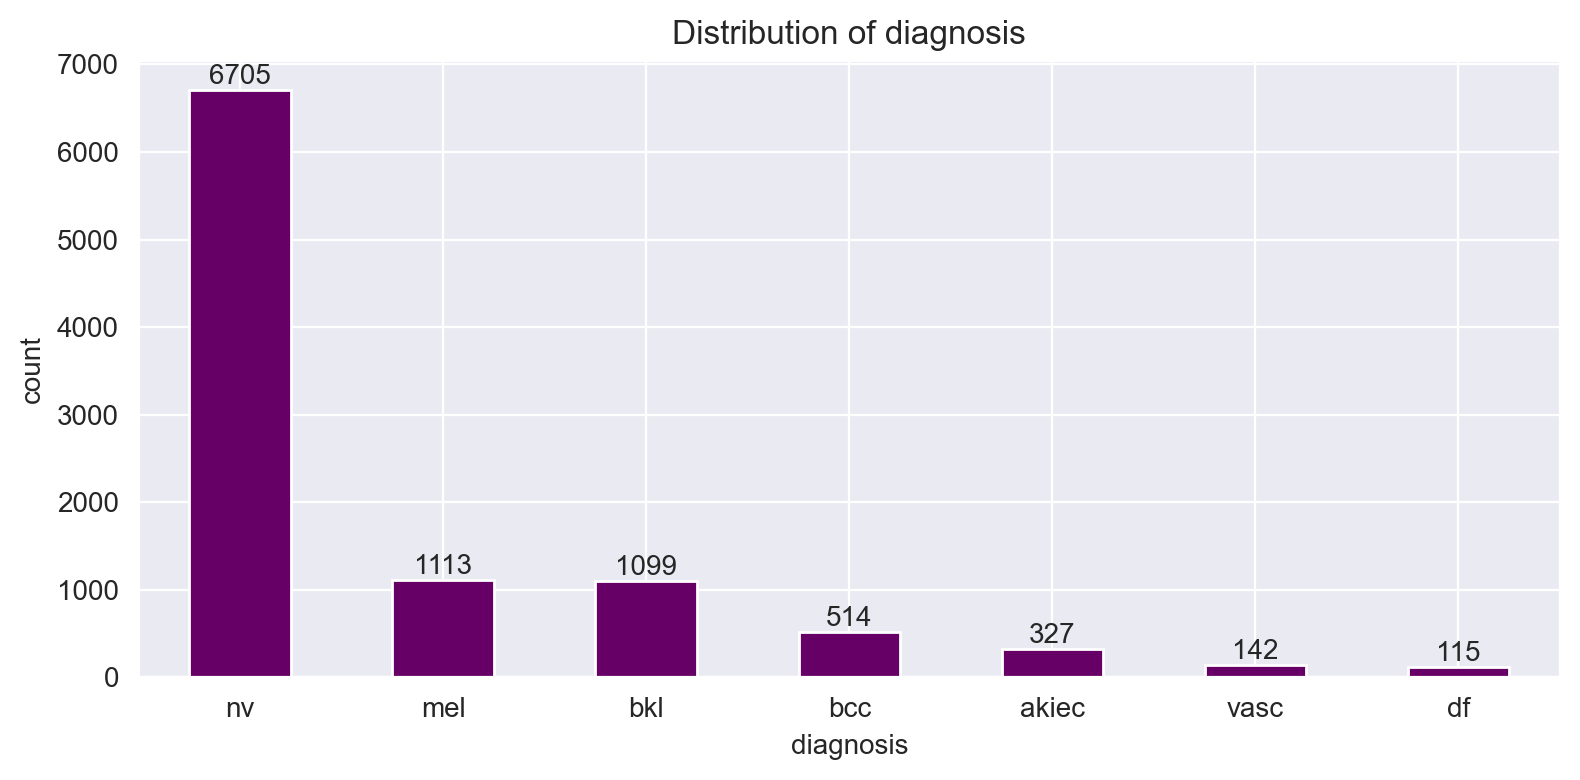

In [102]:
count_plot(df, "diagnosis")  # conclusion: extremely imbalanced dataset. Above 60 % images present "melanocytic nevi" (nv)

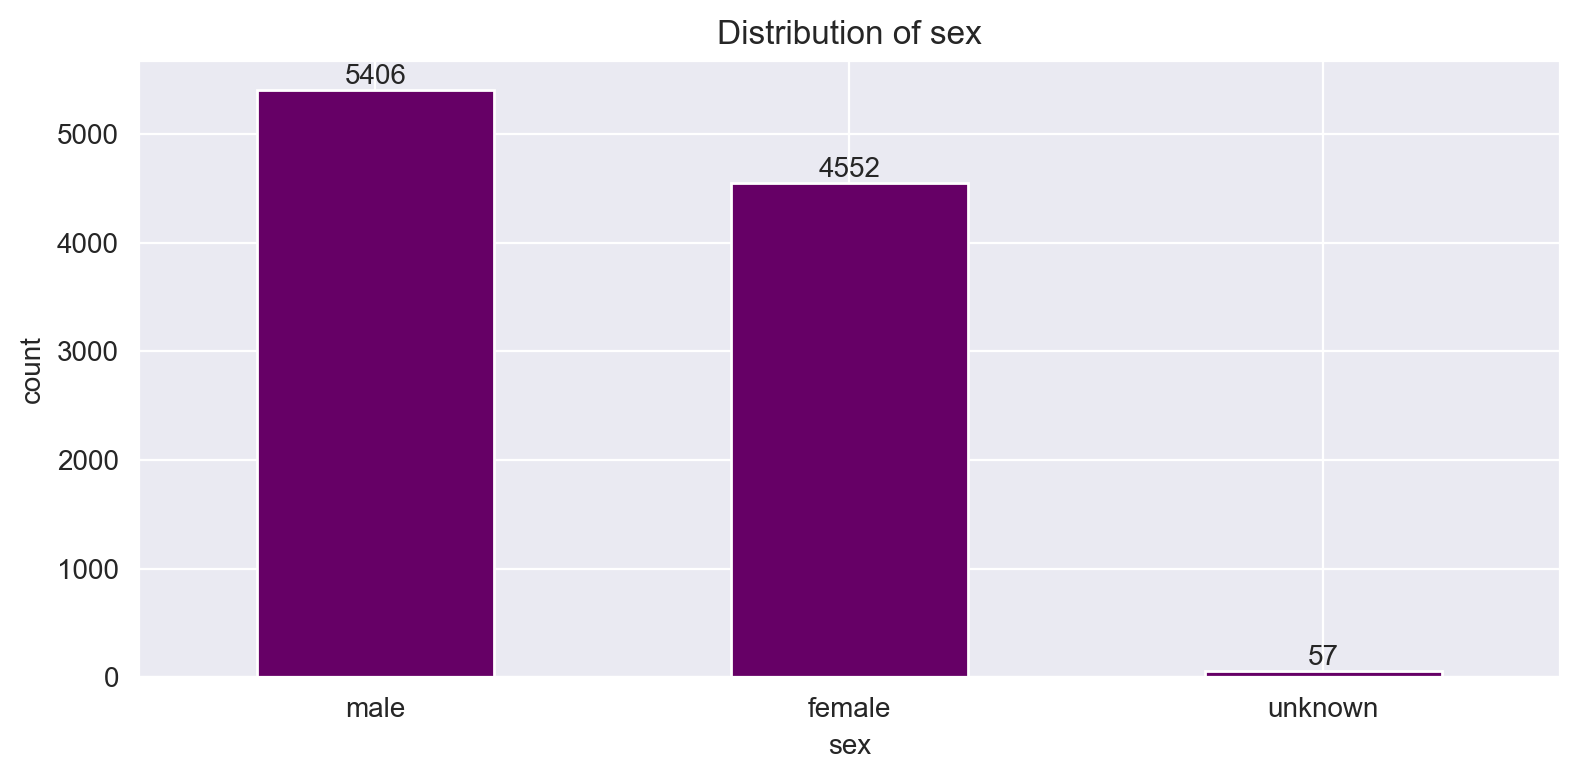

In [79]:
count_plot(df, "sex")

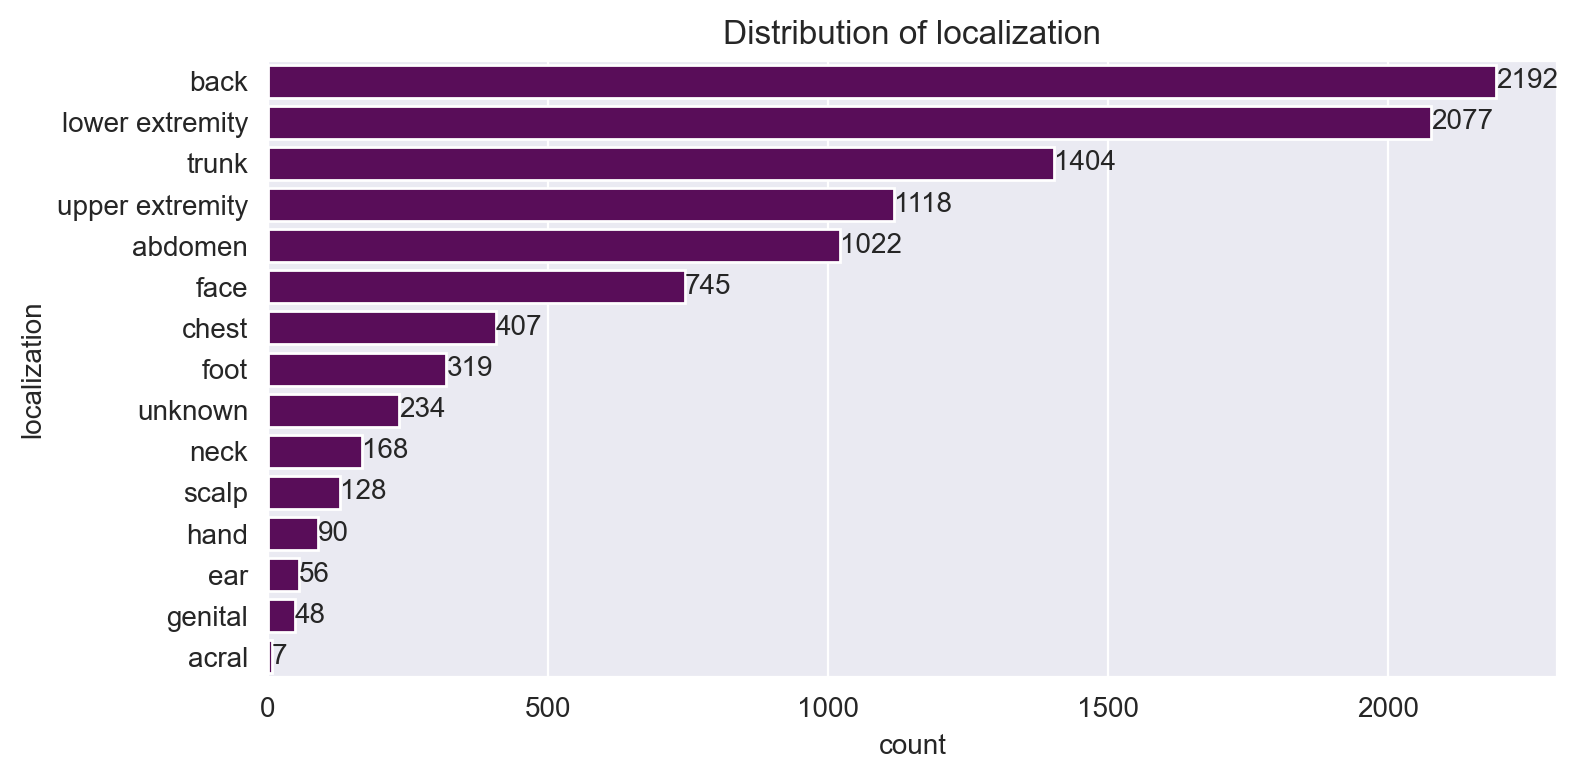

In [114]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.countplot(
    data=df, y="localization", order=df["localization"].value_counts().index, color="#660066"
)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Distribution of localization")
plt.tight_layout()
plt.savefig(".\\DATA\\plots\\distribution_of_localization")

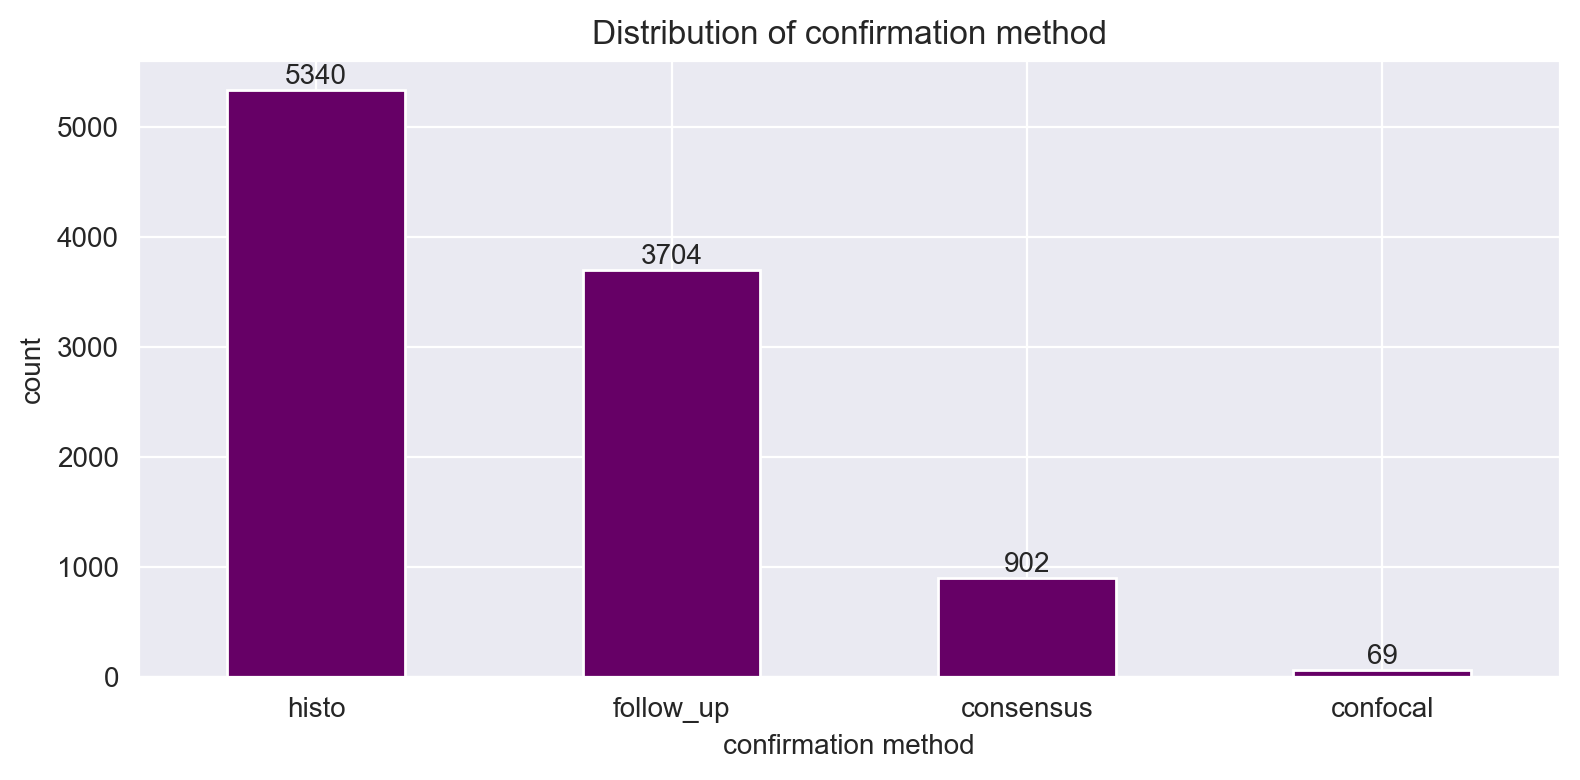

In [104]:
count_plot(df, "confirmation method")

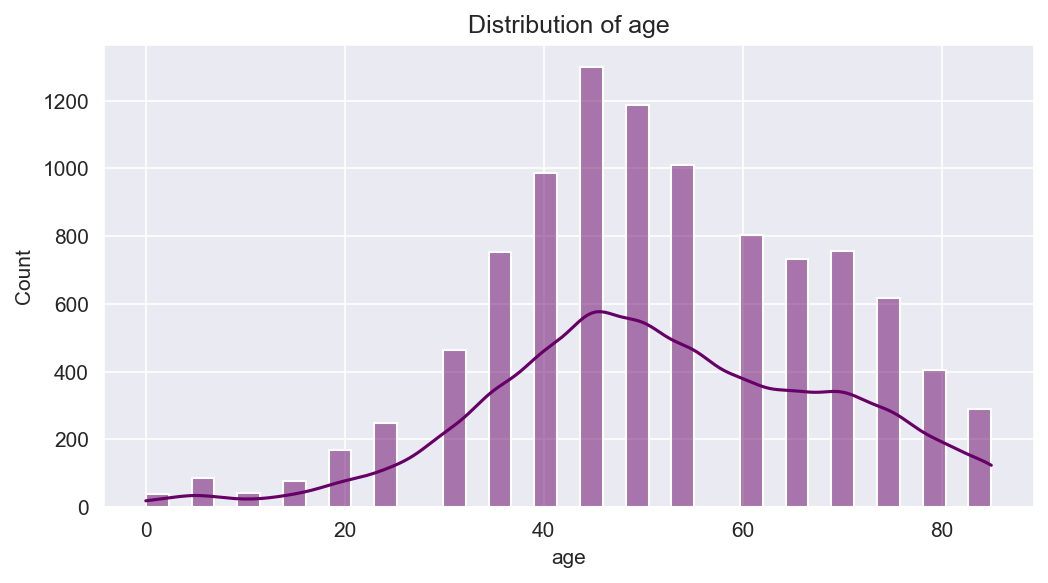

In [115]:
plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(data=df.dropna(), x="age", kde=True, color="#660066")
plt.title("Distribution of age");
# conclusion: the database contains fairly well-balanced patients in terms of age

looks similarly to normal distribution